In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import twitter_samples 

In [11]:
all_positive_samples = twitter_samples.strings("positive_tweets.json")

In [13]:
all_negative_samples = twitter_samples.strings("negative_tweets.json")

In [19]:
len(all_positive_samples)

5000

In [20]:
len(all_negative_samples)

5000

<p>The positive tweets 0
<p>The negative tweets 1

In [24]:
df_positive = pd.DataFrame(all_positive_samples, columns=['text'])
df_positive['label'] = 0

In [25]:
df_positive

,text,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0
1,@Lamb2ja Hey James! How odd :/ Please call our...,0
2,@DespiteOfficial we had a listen last night :)...,0
3,@97sides CONGRATS :),0
4,yeaaaah yippppy!!! my accnt verified rqst has...,0
...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",0
4996,@RachelLiskeard Thanks for the shout-out :) It...,0
4997,@side556 Hey! :) Long time no talk...,0
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,0


In [26]:
df_negative = pd.DataFrame(all_negative_samples, columns=['text'])
df_negative['label'] = 1

In [27]:
df_negative

,text,label
0,hopeless for tmr :(,1
1,Everything in the kids section of IKEA is so c...,1
2,@Hegelbon That heart sliding into the waste ba...,1
3,"“@ketchBurning: I hate Japanese call him ""bani...",1
4,"Dang starting next week I have ""work"" :(",1
...,...,...
4995,I wanna change my avi but uSanele :(,1
4996,MY PUPPY BROKE HER FOOT :(,1
4997,where's all the jaebum baby pictures :((,1
4998,But but Mr Ahmad Maslan cooks too :( https://t...,1


In [32]:
df = pd.concat([df_positive, df_negative], ignore_index=True)

In [33]:
df

,text,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0
1,@Lamb2ja Hey James! How odd :/ Please call our...,0
2,@DespiteOfficial we had a listen last night :)...,0
3,@97sides CONGRATS :),0
4,yeaaaah yippppy!!! my accnt verified rqst has...,0
...,...,...
9995,I wanna change my avi but uSanele :(,1
9996,MY PUPPY BROKE HER FOOT :(,1
9997,where's all the jaebum baby pictures :((,1
9998,But but Mr Ahmad Maslan cooks too :( https://t...,1


In [40]:
df.to_csv("twitter_nltk.csv",  index =False)

In [41]:
data = pd.read_csv("./twitter_nltk.csv")

In [42]:
data

,text,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0
1,@Lamb2ja Hey James! How odd :/ Please call our...,0
2,@DespiteOfficial we had a listen last night :)...,0
3,@97sides CONGRATS :),0
4,yeaaaah yippppy!!! my accnt verified rqst has...,0
...,...,...
9995,I wanna change my avi but uSanele :(,1
9996,MY PUPPY BROKE HER FOOT :(,1
9997,where's all the jaebum baby pictures :((,1
9998,But but Mr Ahmad Maslan cooks too :( https://t...,1


### Preprocessing The Dataset

In [43]:
data.shape

(10000, 2)

In [44]:
data.columns

Index(['text', 'label'], dtype='object')

In [45]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [46]:
data = data.dropna()

In [47]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [48]:
data.shape

(10000, 2)

In [50]:
data["label"].value_counts()

label
0    5000
1    5000
Name: count, dtype: int64

In [51]:
data["label"].unique()

array([0, 1], dtype=int64)

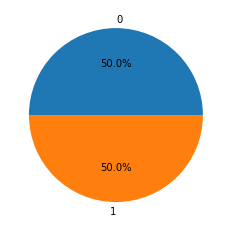

In [53]:
plt.pie(data['label'].value_counts(), labels=data['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [34]:
data["number of characters"] = data["text"].apply(lambda x: len(x))

/tmp/ipykernel_18701/1909348032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["number of characters"] =data["clean_text"].apply(lambda x: len(x))


In [35]:
data

,clean_text,category,number of characters
0,when modi promised “minimum government maximum...,-1.0,210
1,talk all the nonsense and continue all the dra...,0.0,68
2,what did just say vote for modi welcome bjp t...,1.0,117
3,asking his supporters prefix chowkidar their n...,1.0,212
4,answer who among these the most powerful world...,1.0,81
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,108
162976,dear rss terrorist payal gawar what about modi...,-1.0,248
162977,did you cover her interaction forum where she ...,0.0,51
162978,there big project came into india modi dream p...,0.0,77


In [36]:
data["number of words"]= data["clean_text"].apply(lambda x: len(x.split(" ")))

/tmp/ipykernel_18701/2904489396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["number of words"]= data["clean_text"].apply(lambda x: len(x.split(" ")))


In [37]:
data

,clean_text,category,number of characters,number of words
0,when modi promised “minimum government maximum...,-1.0,210,33
1,talk all the nonsense and continue all the dra...,0.0,68,14
2,what did just say vote for modi welcome bjp t...,1.0,117,23
3,asking his supporters prefix chowkidar their n...,1.0,212,34
4,answer who among these the most powerful world...,1.0,81,15
...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,108,19
162976,dear rss terrorist payal gawar what about modi...,-1.0,248,36
162977,did you cover her interaction forum where she ...,0.0,51,10
162978,there big project came into india modi dream p...,0.0,77,13


In [40]:
data["mean word length"] = data["clean_text"].apply(lambda x:np.mean([len(word) for word in x.split()]))

/home/kaustuv/.pyenv/versions/3.9.14/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/tmp/ipykernel_18701/1916639016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mean word length"] = data["clean_text"].apply(lambda x:np.mean([len(word) for word in x.split()]))


In [41]:
data

,clean_text,category,number of characters,number of words,mean word length
0,when modi promised “minimum government maximum...,-1.0,210,33,5.393939
1,talk all the nonsense and continue all the dra...,0.0,68,14,4.230769
2,what did just say vote for modi welcome bjp t...,1.0,117,23,4.318182
3,asking his supporters prefix chowkidar their n...,1.0,212,34,5.264706
4,answer who among these the most powerful world...,1.0,81,15,4.785714
...,...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,108,19,5.000000
162976,dear rss terrorist payal gawar what about modi...,-1.0,248,36,5.916667
162977,did you cover her interaction forum where she ...,0.0,51,10,4.666667
162978,there big project came into india modi dream p...,0.0,77,13,5.000000
